# Section 0: Load Libraries

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Section 1: Load and Explore Dataset

In [301]:
df = pd.read_csv('../Resources/bankchurn.csv')

In [302]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [303]:
#Drop columns not usable for ML
df.drop(labels = ['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [304]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [305]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [306]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [307]:
X[0]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [308]:
y

array([1, 0, 1, ..., 1, 1, 0])

# Section 2: Encoding of Categorical Columns

In [309]:
#encoding the Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [310]:
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [311]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [312]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [313]:
X[1]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

In [314]:
X[7]

array([0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
      dtype=object)

# Section 3: Train Test Split & Scaling

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
len(X_train)

8000

In [317]:
len(X_test)

2000

In [318]:
len(y_train)

8000

In [319]:
len(y_test)

2000

In [320]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [321]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [322]:
df.iloc[0]

CreditScore           619
Geography          France
Gender             Female
Age                    42
Tenure                  2
Balance                 0
NumOfProducts           1
HasCrCard               1
IsActiveMember          1
EstimatedSalary    101349
Exited                  1
Name: 0, dtype: object

In [323]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [324]:
X_train[0]

array([ 1.00150113, -0.57946723, -0.57638802,  0.35649971,  0.91324755,
       -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,  0.64920267,
        0.97481699,  1.36766974])

# Section 4: K-NN Model

In [325]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [326]:
y_pred = knn.predict(X_test)

In [327]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1567,   40],
       [ 283,  110]])

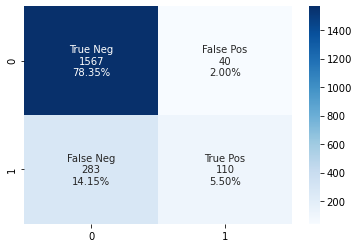

In [328]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [329]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.73      0.28      0.41       393

    accuracy                           0.84      2000
   macro avg       0.79      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



# Section 5: SVM

In [330]:
from sklearn.svm import SVC 
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [331]:
y_pred = svm.predict(X_test)

In [332]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1562,   45],
       [ 243,  150]])

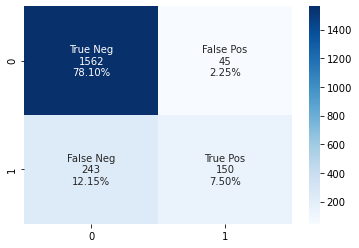

In [333]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [334]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



# Section 6: Decision Tree

In [335]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [336]:
y_pred = dtc.predict(X_test)

In [337]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1360,  247],
       [ 203,  190]])

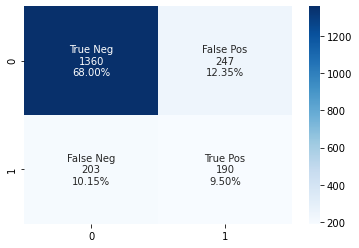

In [338]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [339]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.43      0.48      0.46       393

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



[Text(660.5583135474058, 887.88, 'X[5] <= 0.533\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(515.7761046488673, 851.64, 'X[8] <= 1.671\ngini = 0.228\nsamples = 6130\nvalue = [5324, 806]'),
 Text(406.57459926702836, 815.4, 'X[8] <= -0.054\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(276.45413792121127, 779.16, 'X[5] <= -0.038\ngini = 0.3\nsamples = 2952\nvalue = [2410, 542]'),
 Text(172.6481823643008, 742.92, 'X[1] <= 0.573\ngini = 0.236\nsamples = 2127\nvalue = [1837, 290]'),
 Text(96.64392102338152, 706.68, 'X[7] <= -0.073\ngini = 0.195\nsamples = 1617\nvalue = [1440, 177]'),
 Text(27.72204052584442, 670.44, 'X[5] <= -0.798\ngini = 0.336\nsamples = 422\nvalue = [332, 90]'),
 Text(20.346724667349026, 634.2, 'X[11] <= 1.687\ngini = 0.225\nsamples = 124\nvalue = [108, 16]'),
 Text(15.468270214943704, 597.96, 'X[5] <= -1.179\ngini = 0.205\nsamples = 121\nvalue = [107, 14]'),
 Text(8.567041965199591, 561.72, 'X[5] <= -1.939\ngini = 0.346\nsamples = 45\nvalue 

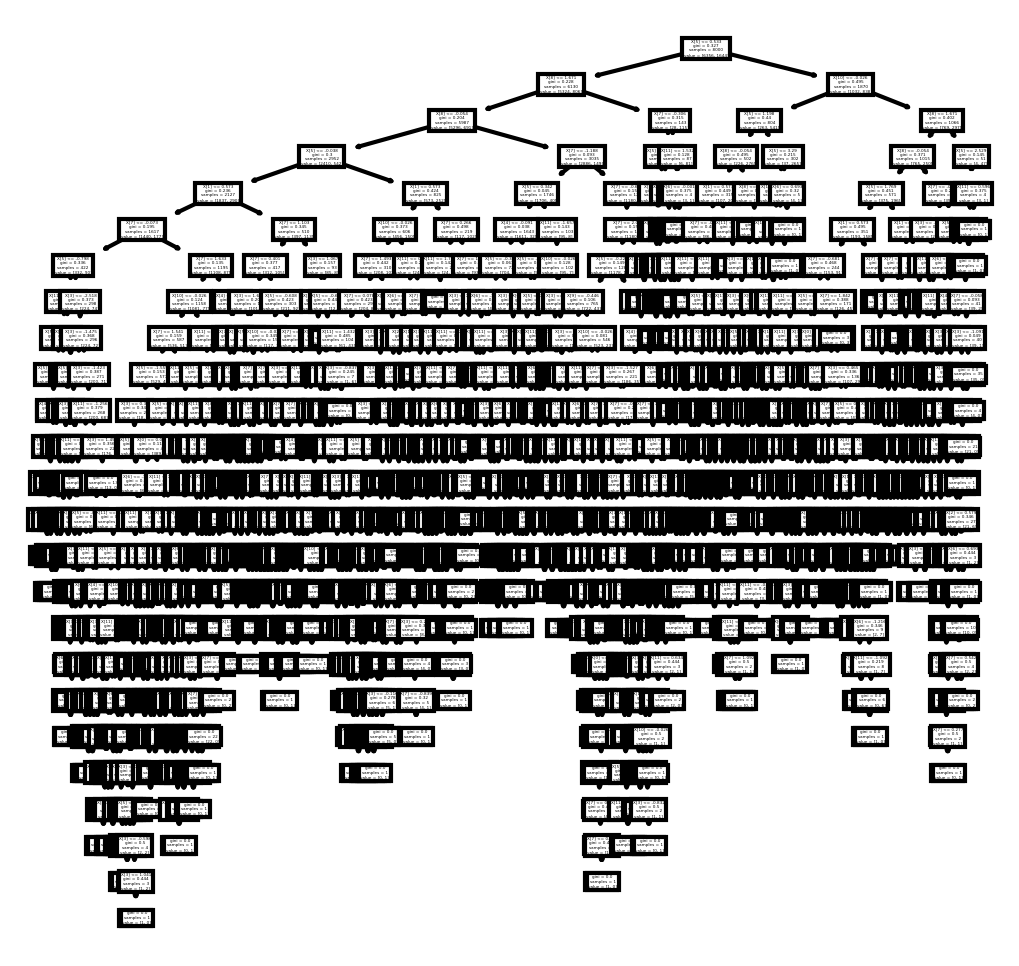

In [340]:
from sklearn import tree
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dtc)

Feature: 0, Score: 0.00808
Feature: 1, Score: 0.02257
Feature: 2, Score: 0.00648
Feature: 3, Score: 0.12797
Feature: 4, Score: 0.01442
Feature: 5, Score: 0.21654
Feature: 6, Score: 0.07611
Feature: 7, Score: 0.16164
Feature: 8, Score: 0.11931
Feature: 9, Score: 0.01700
Feature: 10, Score: 0.07022
Feature: 11, Score: 0.15967


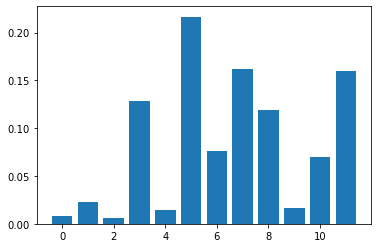

In [341]:
# get importance
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [342]:
X[0]
# Feature 5: Age, Feature7: Balance, Feature 11: Salary, Feature 3: Credit Score 

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [427]:
df.iloc[0]

CreditScore           619
Geography          France
Gender             Female
Age                    42
Tenure                  2
Balance                 0
NumOfProducts           1
HasCrCard               1
IsActiveMember          1
EstimatedSalary    101349
Exited                  1
Name: 0, dtype: object

# Section 7: Random Forest

In [343]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
# rf.fit(X_train, y_train)

In [344]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfgrid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, verbose=3)
rfgrid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.842 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.831 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.841 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.840 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.835 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.841 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.831 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.841 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=4, max_feat

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1000;, score=0.854 total time=   3.7s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.850 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.843 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.851 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.858 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200;, score=0.854 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500;, score=0.849 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500;, score=0.842 total time=   2.2s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500;, score=0.852 total time=   2.1s


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=1000;, score=0.863 total time=   4.5s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=1000;, score=0.856 total time=   4.8s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.868 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.848 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.858 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.863 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.856 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500;, score=0.868 total time=   2.2s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500;, score=0.848 total time=   2.3s

[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=1000;, score=0.861 total time=   4.8s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=1000;, score=0.866 total time=   5.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=1000;, score=0.857 total time=   4.9s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.838 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.831 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.840 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.834 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.834 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.839

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.850 total time=   2.3s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000;, score=0.846 total time=   4.2s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000;, score=0.840 total time=   4.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000;, score=0.851 total time=   4.4s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000;, score=0.850 total time=   4.3s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000;, score=0.850 total time=   4.2s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200;, score=0.846 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200;, score=0.844 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200;, 

[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.846 total time=   2.4s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.858 total time=   2.4s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.864 total time=   2.5s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500;, score=0.854 total time=   2.5s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=1000;, score=0.869 total time=   5.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=1000;, score=0.848 total time=   5.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=1000;, score=0.858 total time=   4.9s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=1000;, score=0.864 total time=   4.8s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=1000;, 

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=200;, score=0.864 total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=200;, score=0.856 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500;, score=0.873 total time=   2.9s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500;, score=0.853 total time=   2.8s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500;, score=0.860 total time=   3.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500;, score=0.864 total time=   2.9s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500;, score=0.856 total time=   2.8s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=1000;, score=0.871 total time=   5.9s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=1000;, sco

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]},
             verbose=3)

In [345]:
print(rfgrid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [346]:
y_pred = rfgrid.predict(X_test)

In [347]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1557,   50],
       [ 228,  165]])

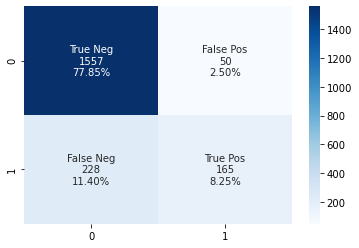

In [348]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [349]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



# Section 8: ANN

In [367]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [368]:
len(X_train[0])

12

In [370]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=6, activation='relu'))
# ann.add(Dense(units=20, activation='relu'))
# ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [371]:
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [372]:
ann.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
250/250 - 1s - loss: 0.5530 - accuracy: 0.7764
Epoch 2/100
250/250 - 0s - loss: 0.4813 - accuracy: 0.7945
Epoch 3/100
250/250 - 0s - loss: 0.4601 - accuracy: 0.7945
Epoch 4/100
250/250 - 0s - loss: 0.4469 - accuracy: 0.7960
Epoch 5/100
250/250 - 0s - loss: 0.4370 - accuracy: 0.8045
Epoch 6/100
250/250 - 0s - loss: 0.4302 - accuracy: 0.8148
Epoch 7/100
250/250 - 0s - loss: 0.4258 - accuracy: 0.8204
Epoch 8/100
250/250 - 0s - loss: 0.4226 - accuracy: 0.8213
Epoch 9/100
250/250 - 0s - loss: 0.4196 - accuracy: 0.8217
Epoch 10/100
250/250 - 0s - loss: 0.4172 - accuracy: 0.8239
Epoch 11/100
250/250 - 0s - loss: 0.4144 - accuracy: 0.8265
Epoch 12/100
250/250 - 0s - loss: 0.4115 - accuracy: 0.8300
Epoch 13/100
250/250 - 0s - loss: 0.4086 - accuracy: 0.8295
Epoch 14/100
250/250 - 0s - loss: 0.4045 - accuracy: 0.8338
Epoch 15/100
250/250 - 0s - loss: 0.4000 - accuracy: 0.8357
Epoch 16/100
250/250 - 0s - loss: 0.3951 - accuracy: 0.8359
Epoch 17/100
250/250 - 0s - loss: 0.3900 - accura

In [374]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [375]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [376]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1531,   76],
       [ 207,  186]])

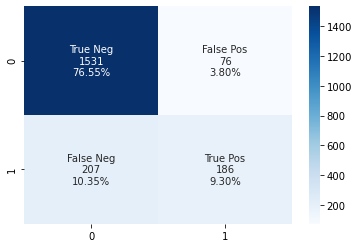

In [377]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [378]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



# Section 9: Predicting a New Value

In [379]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [392]:
#Setting up a new row. simulating we get this from our form in HTML
X = np.array([[320, 'France', 'Male', 21, 8, 159660.80, 3, 1, 0, 113931.57]])
X

array([['320', 'France', 'Male', '21', '8', '159660.8', '3', '1', '0',
        '113931.57']], dtype='<U21')

In [393]:
#Encoding the  Gender column
X[:,2] = le.transform(X[:,2])

In [394]:
X

array([['320', 'France', '1', '21', '8', '159660.8', '3', '1', '0',
        '113931.57']], dtype='<U21')

In [395]:
#Encoding the country column
X = np.array(ct.transform(X))
X

array([['1.0', '0.0', '0.0', '320', '1', '21', '8', '159660.8', '3', '1',
        '0', '113931.57']], dtype='<U32')

In [396]:
#Scaling all columns
X = sc.transform(X)
X

array([[ 1.00150113, -0.57946723, -0.57638802, -3.44174985,  0.91324755,
        -1.7015827 ,  1.03972843,  1.33785683,  2.53355998,  0.64920267,
        -1.02583358,  0.23472492]])

In [397]:
#Predicting with ANN
new_pred = ann.predict(X)>0.5
new_pred

array([[False]])

# Section 10: Saving Sklearn Objects and Keras ANN Model

In [398]:
import pickle
# Saving SkLearn Objects
# Save Label encoder: le
pkl_filename = "Label_Encoder.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(le, file)

#Save One-Hot encoder: ct
pkl_filename = "OneHot_Encoder.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(ct, file)
    
#Save scaler: sc
pkl_filename = "Scaler.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(sc, file)

In [399]:
#Save ANN
# Save the model
ann.save("customer_churn.h5")

# Section 11: Additional Visualizations

In [400]:
#For the ANN
from keras_sequential_ascii import keras2ascii
keras2ascii(ann)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          12
               Dense   XXXXX -------------------        78    61.4%
                relu   #####           6
               Dense   XXXXX -------------------        42    33.1%
                relu   #####           6
               Dense   XXXXX -------------------         7     5.5%
             sigmoid   #####           1


In [403]:
#Train RF with values from Grid search
rf = RandomForestClassifier(random_state=123, criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 200)
# Train
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=123)

In [404]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [428]:
# Visualizing one tree of RF
# Extract single tree
estimator = rf.estimators_[100]

[Text(167.44287909836066, 205.35999999999999, 'X[5] <= 0.342\ngini = 0.326\nsamples = 5043\nvalue = [6362, 1638]'),
 Text(75.51009221311476, 181.2, 'X[7] <= 0.455\ngini = 0.204\nsamples = 3563\nvalue = [5013, 653]'),
 Text(37.905122950819674, 157.04, 'X[3] <= -2.518\ngini = 0.157\nsamples = 2031\nvalue = [2928, 275]'),
 Text(36.53299180327869, 132.88, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(39.27725409836066, 132.88, 'X[5] <= -0.418\ngini = 0.156\nsamples = 2028\nvalue = [2928, 272]'),
 Text(20.23893442622951, 108.72, 'X[11] <= 1.082\ngini = 0.088\nsamples = 1039\nvalue = [1572, 76]'),
 Text(10.97704918032787, 84.56, 'X[6] <= 0.866\ngini = 0.065\nsamples = 840\nvalue = [1272, 44]'),
 Text(5.488524590163935, 60.400000000000006, 'X[8] <= 1.671\ngini = 0.08\nsamples = 627\nvalue = [938, 41]'),
 Text(2.7442622950819673, 36.24000000000001, 'X[8] <= -0.054\ngini = 0.07\nsamples = 618\nvalue = [927, 35]'),
 Text(1.3721311475409836, 12.079999999999984, 'gini = 0.175\nsamples = 214\nv

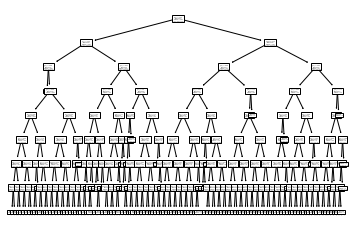

In [416]:
tree.plot_tree(estimator)

In [418]:
tree.export_graphviz(estimator)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[5] <= 0.342\\ngini = 0.326\\nsamples = 5043\\nvalue = [6362, 1638]"] ;\n1 [label="X[7] <= 0.455\\ngini = 0.204\\nsamples = 3563\\nvalue = [5013, 653]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= -2.518\\ngini = 0.157\\nsamples = 2031\\nvalue = [2928, 275]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n2 -> 3 ;\n4 [label="X[5] <= -0.418\\ngini = 0.156\\nsamples = 2028\\nvalue = [2928, 272]"] ;\n2 -> 4 ;\n5 [label="X[11] <= 1.082\\ngini = 0.088\\nsamples = 1039\\nvalue = [1572, 76]"] ;\n4 -> 5 ;\n6 [label="X[6] <= 0.866\\ngini = 0.065\\nsamples = 840\\nvalue = [1272, 44]"] ;\n5 -> 6 ;\n7 [label="X[8] <= 1.671\\ngini = 0.08\\nsamples = 627\\nvalue = [938, 41]"] ;\n6 -> 7 ;\n8 [label="X[8] <= -0.054\\ngini = 0.07\\nsamples = 618\\nvalue = [927, 35]"] ;\n7 -> 8 ;\n9 [label="gini = 0.175\\nsamples = 214\\nvalue = [289, 31]"] ;\n8 -> 9 ;\n10 [label="gini = 0.012\\nsamples = 404\\

In [411]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
#                 feature_names = df.columns[:-1],
                class_names = ['No_Churn','Churn'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [419]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [408]:
df.columns[:-1]

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [421]:
#Feature Importance from RF
import time
start_time = time.time()
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.028 seconds


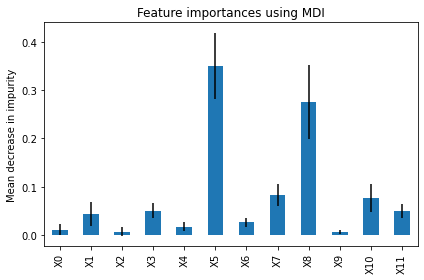

In [423]:
forest_importances = pd.Series(importances, index=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

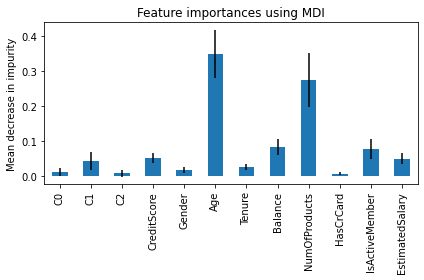

In [430]:
forest_importances = pd.Series(importances, index=['C0','C1','C2','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
['1.0', '0.0', '0.0', '320', '1', '21', '8', '159660.8', '3', '1',
        '0', '113931.57'

In [425]:
#RF Feature Importances
# Feature 5: Age, Feature8: Number of Products, Feature 10: Active_Member, Feature 7: Balance

array([ 1.00150113, -0.57946723, -0.57638802, -3.44174985,  0.91324755,
       -1.7015827 ,  1.03972843,  1.33785683,  2.53355998,  0.64920267,
       -1.02583358,  0.23472492])

In [429]:
forest_importances

X0     0.011575
X1     0.043348
X2     0.007514
X3     0.050952
X4     0.017670
X5     0.350103
X6     0.026479
X7     0.083313
X8     0.275550
X9     0.006407
X10    0.077135
X11    0.049954
dtype: float64

In [426]:
df.iloc[0]

CreditScore           619
Geography          France
Gender             Female
Age                    42
Tenure                  2
Balance                 0
NumOfProducts           1
HasCrCard               1
IsActiveMember          1
EstimatedSalary    101349
Exited                  1
Name: 0, dtype: object

In [ ]:
#Decision Tree Feature Importance
# Feature 5: Age, Feature7: Balance, Feature 11: Salary, Feature 3: Credit Score 